In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split


In [2]:
dataset = pd.read_excel("C:\HOUSE PRICE PREDICTION\HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
dataset.shape


(2919, 13)

In [4]:
print(dataset.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


<AxesSubplot: >

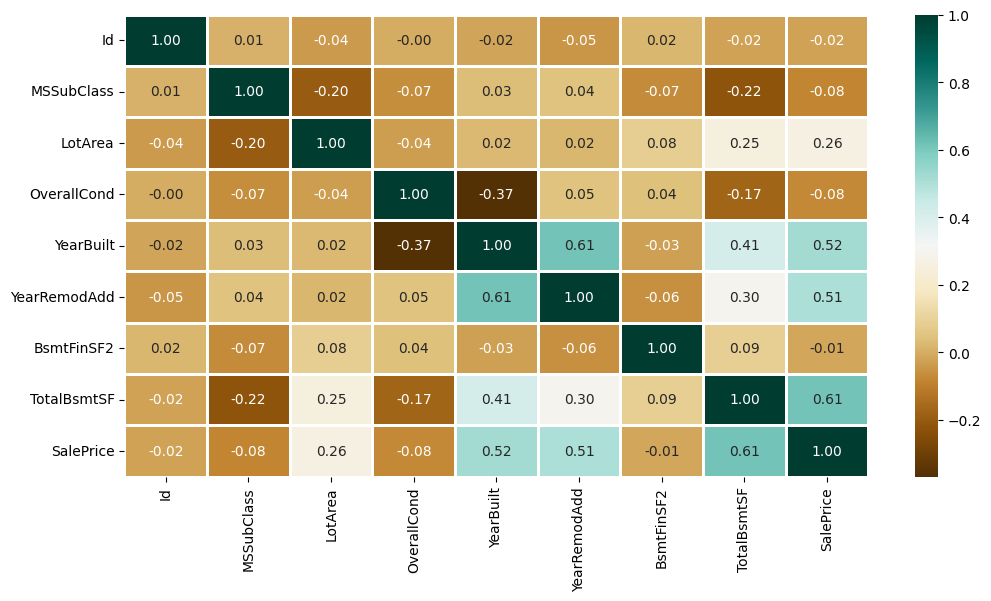

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_13932\1449724743.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


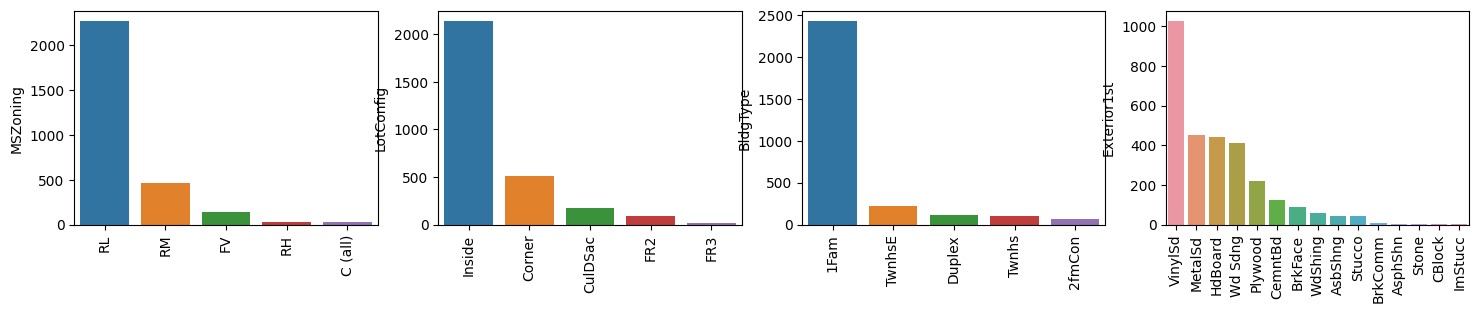

In [7]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


In [8]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


In [9]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [10]:
new_dataset = dataset.dropna()


In [11]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)

df_final = pd.concat([new_dataset.drop(object_cols, axis=1), OH_cols], axis=1)


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [16]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [17]:
#SUPPORT VECTOR MACHINE
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19402339300836682

In [18]:
#RANDOM FOREST 
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19070759769693982

C:\Users\Dell\AppData\Local\Temp\ipykernel_13932\2601200060.py:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


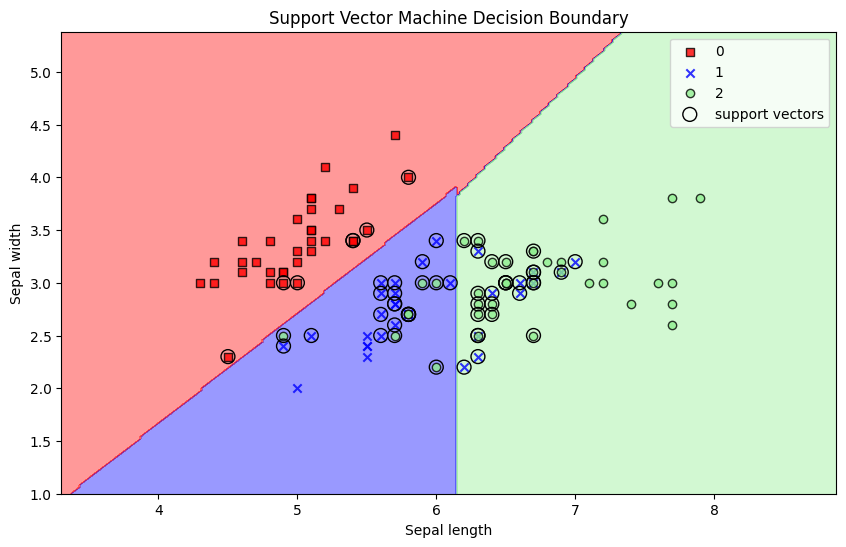

Mean absolute percentage error of Random Forest Regressor model: 30023997515803.57


In [21]:
#VISUALISATION OF SUPPORT VECTOR MACHINE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Split the data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

# Random Forest Regressor model
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

# SVM model
model_SVM = SVC(kernel='linear', C=1.0, random_state=0)
model_SVM.fit(X_train, Y_train)

# Plot decision boundary
def plot_decision_regions(X, y, classifier):
    resolution = 0.02
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

# Visualize SVM decision boundary
plt.figure(figsize=(10,6))
plot_decision_regions(X_train, Y_train, classifier=model_SVM)
plt.scatter(model_SVM.support_vectors_[:, 0], model_SVM.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='support vectors')
plt.legend(loc='upper right')
plt.title('Support Vector Machine Decision Boundary')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Mean absolute percentage error of Random Forest Regressor model
print('Mean absolute percentage error of Random Forest Regressor model:', mean_absolute_percentage_error(Y_valid, Y_pred))


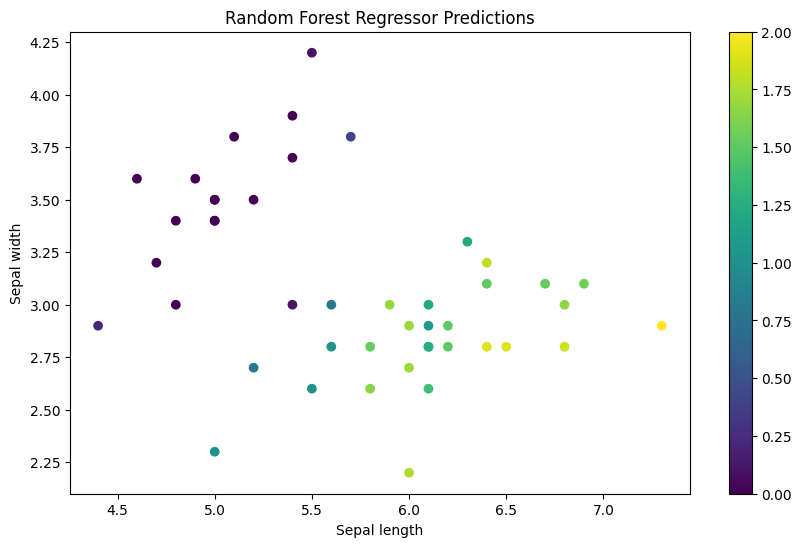

Mean absolute percentage error of Random Forest Regressor model: <function mean_absolute_percentage_error at 0x000002874A8E0820>


In [22]:
#VISUALISATION OF RANDOM FOREST

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Split the data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

# Random Forest Regressor model
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

# SVM model
model_SVM = SVC(kernel='linear', C=1.0, random_state=0)
model_SVM.fit(X_train, Y_train)

# Plot decision boundary for SVM model
def plot_decision_regions(X, y, classifier):
    resolution = 0.02
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
# Plot scatter plot for Random Forest Regressor model
plt.figure(figsize=(10,6))
plt.scatter(X_valid[:, 0], X_valid[:, 1], c=Y_pred, cmap='viridis')
plt.colorbar()
plt.title('Random Forest Regressor Predictions')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Mean absolute percentage error of Random Forest Regressor model
print('Mean absolute percentage error of Random Forest Regressor model:', mean_absolute_percentage_error)


In [19]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1874168384159986


In [23]:
#REGRESSION(feedforward neural network)
dataset = pd.read_excel("C:\HOUSE PRICE PREDICTION\HousePricePrediction.xlsx")
# Split the data into features and target
X = dataset.drop(['Id', 'SalePrice'], axis=1)
y = dataset['SalePrice']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)


Epoch 1/100
73/73 [==============================] - 2s 7ms/step - loss: nan - val_loss: nan
Epoch 2/100
73/73 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 3/100
73/73 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
73/73 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
73/73 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
73/73 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
73/73 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
73/73 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
73/73 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/100
73/73 [==============================] - 0s 5ms/step - l

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


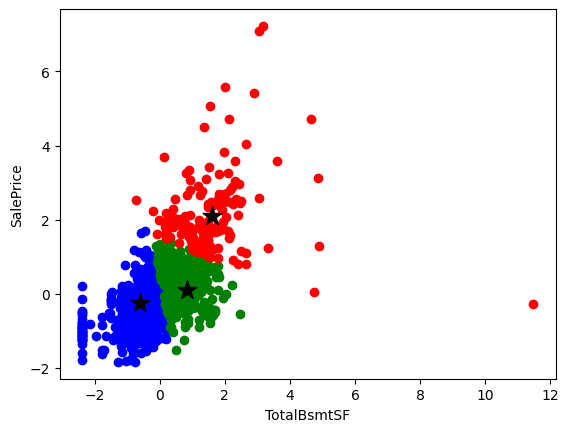

In [24]:
#CLUSTERING USING K MEANS

# Select the relevant columns and standardize the data
X = dataset[['TotalBsmtSF', 'SalePrice']]
X = (X - X.mean()) / X.std()

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
imp = SimpleImputer(strategy='mean')

# impute missing values with mean of non-missing values
X_imputed = imp.fit_transform(X)

# create an instance of KMeans class and fit the imputed data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_imputed)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and the centroids
colors = ['b', 'g', 'r']
for i in range(len(colors)):
    x = X[labels == i]['TotalBsmtSF']
    y = X[labels == i]['SalePrice']
    plt.scatter(x, y, c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()


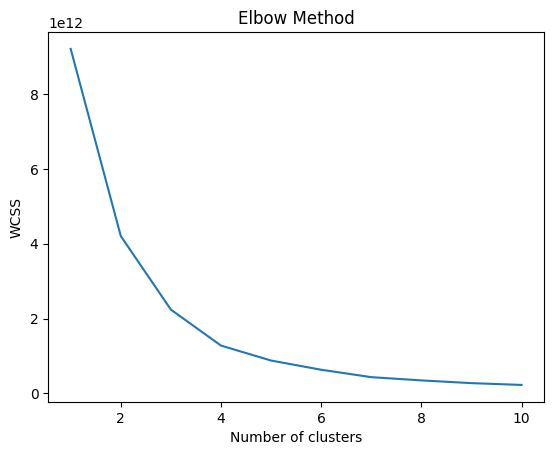

In [25]:
#CLUSTERING USING ELBOW METHOD

# Choose the relevant features
X = dataset[['TotalBsmtSF', 'SalePrice']]

# Impute missing values with mean of non-missing values
imp = SimpleImputer(strategy='mean')
X_imputed = imp.fit_transform(X)

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # create an instance of KMeans class and fit the imputed data
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

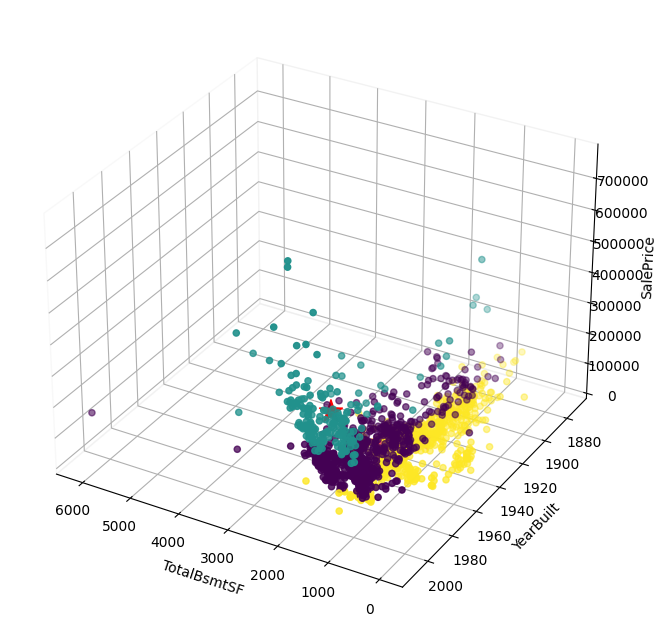

In [26]:
#VISUALISATION OF K MEANS IN 3D

from mpl_toolkits.mplot3d import Axes3D

# Choose the relevant features
X = dataset[['TotalBsmtSF', 'YearBuilt','SalePrice']]

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    imp = SimpleImputer(strategy='mean')

    # impute missing values with mean of non-missing values
    X_imputed = imp.fit_transform(X)

    # create an instance of KMeans class and fit the imputed data
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=3, n_init=10)

imp = SimpleImputer(strategy='mean')

# impute missing values with mean of non-missing values
X_imputed = imp.fit_transform(X)

# fit the KMeans model on the imputed data
kmeans.fit(X_imputed)

# add the cluster labels to the dataset
dataset['Cluster'] = kmeans.predict(X_imputed)

# plot the clusters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['TotalBsmtSF'], dataset['YearBuilt'], dataset['SalePrice'], c=dataset['Cluster'], cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='*', s=300, c='r')
ax.set_xlabel('TotalBsmtSF')
ax.set_ylabel('YearBuilt')
ax.set_zlabel('SalePrice')

# update the input format to 3D plotting functions
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(azim=120)

plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


In [28]:
X.shape

(2919, 3)

In [29]:
y.shape

(157,)

In [30]:
#NEURAL NETWORK
from sklearn.neural_network import MLPRegressor
import numpy as np

# Generate some random data
X = np.random.rand(100, 5)
y = np.random.rand(100, 1)

# Flatten the target variable y to a 1D array using the ravel() function
y = y.ravel()

# Create an instance of the MLPRegressor class
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

# Fit the model to the data
mlp.fit(X, y)


MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

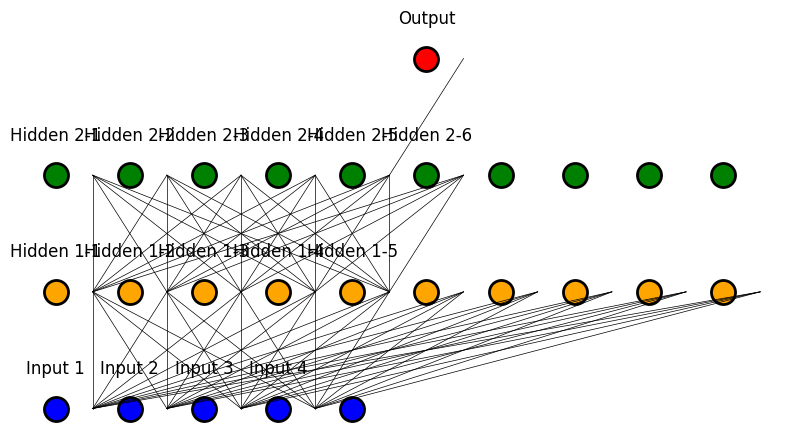

In [31]:
#NEURAL NETWORK VISUALISATION

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPRegressor

# Generate some random data
X = np.random.rand(100, 5)
y = np.random.rand(100, 1)

# Flatten the target variable y to a 1D array using the ravel() function
y = y.ravel()

# Create an instance of the MLPRegressor class
mlp = MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000)

# Fit the model to the data
mlp.fit(X, y)

# Visualize the neural network using Matplotlib and Seaborn
fig, ax = plt.subplots(figsize=(10, 5))


# Plot the input layer
ax.scatter(np.arange(5) + 0.5, [1] * 5, s=300, c="blue", edgecolor="black", linewidth=2)
for i in range(4):
    ax.annotate("Input {}".format(i+1), xy=(i+0.5, 1), xytext=(i+0.5, 1.3), ha="center", fontsize=12)

# Plot the first hidden layer
ax.scatter(np.arange(10) + 0.5, [2] * 10, s=300, c="orange", edgecolor="black", linewidth=2)
for i in range(5):
    ax.annotate("Hidden 1-{}".format(i+1), xy=(i+0.5, 2), xytext=(i+0.5, 2.3), ha="center", fontsize=12)

# Plot the second hidden layer
ax.scatter(np.arange(10) + 0.5, [3] * 10, s=300, c="green", edgecolor="black", linewidth=2)
for i in range(6):
    ax.annotate("Hidden 2-{}".format(i+1), xy=(i+0.5, 3), xytext=(i+0.5, 3.3), ha="center", fontsize=12)

# Plot the output layer
ax.scatter([5.5], [4], s=300, c="red", edgecolor="black", linewidth=2)
ax.annotate("Output", xy=(5.5, 4), xytext=(5.5, 4.3), ha="center", fontsize=12)

# Add edges between nodes
for i in range(4):
    for j in range(10):
        ax.plot([i+1, j+1], [1, 2], c="black", lw=0.5)
for i in range(5):
    for j in range(6):
        ax.plot([i+1, j+1], [2, 3], c="black", lw=0.5)
ax.plot([5, 6], [3, 4], c="black", lw=0.5)

# Remove axis ticks and labels
ax.set_yticks([])
ax.set_xticks([])
ax.axis("off")

plt.show()
